In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import missingno as msno

# Loading the dataset (from previous analysis, sliced for metabolomics only)
to_be_imputed = pd.read_csv('<filename>.csv', low_memory = False)

## Impute missing values

<Axes: >

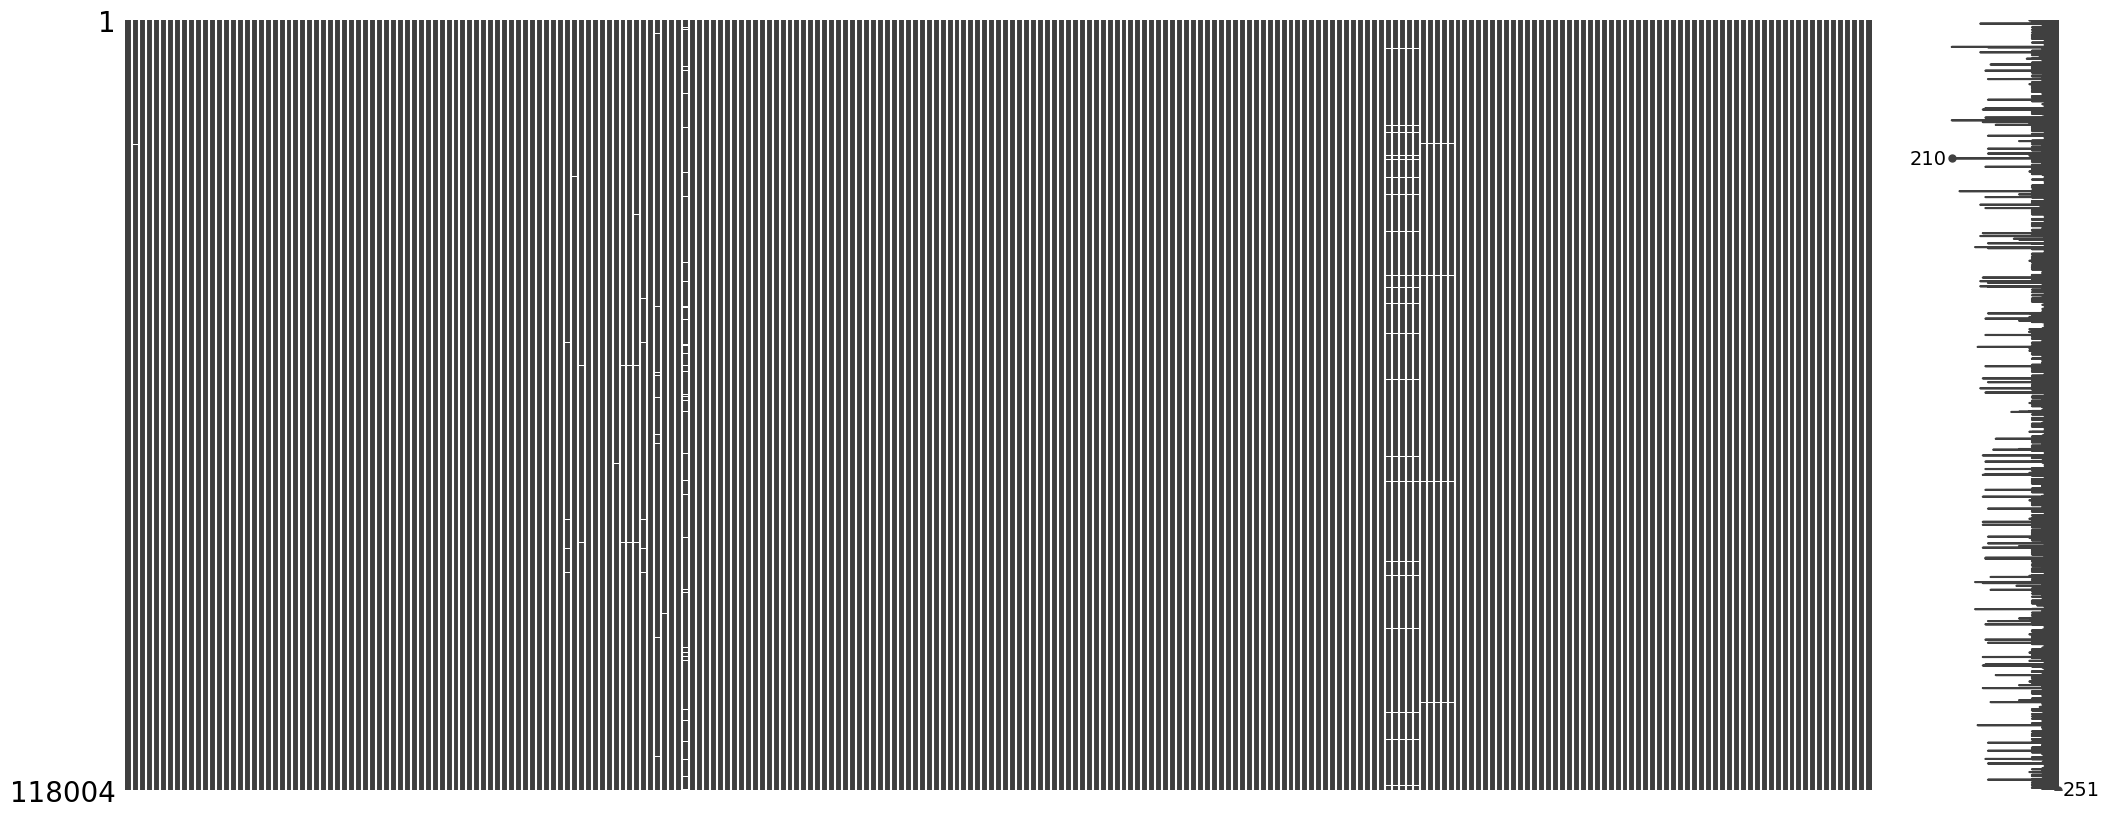

In [24]:
# Visualizing missing values in the data (before imputation)
msno.matrix(to_be_imputed)

<Axes: >

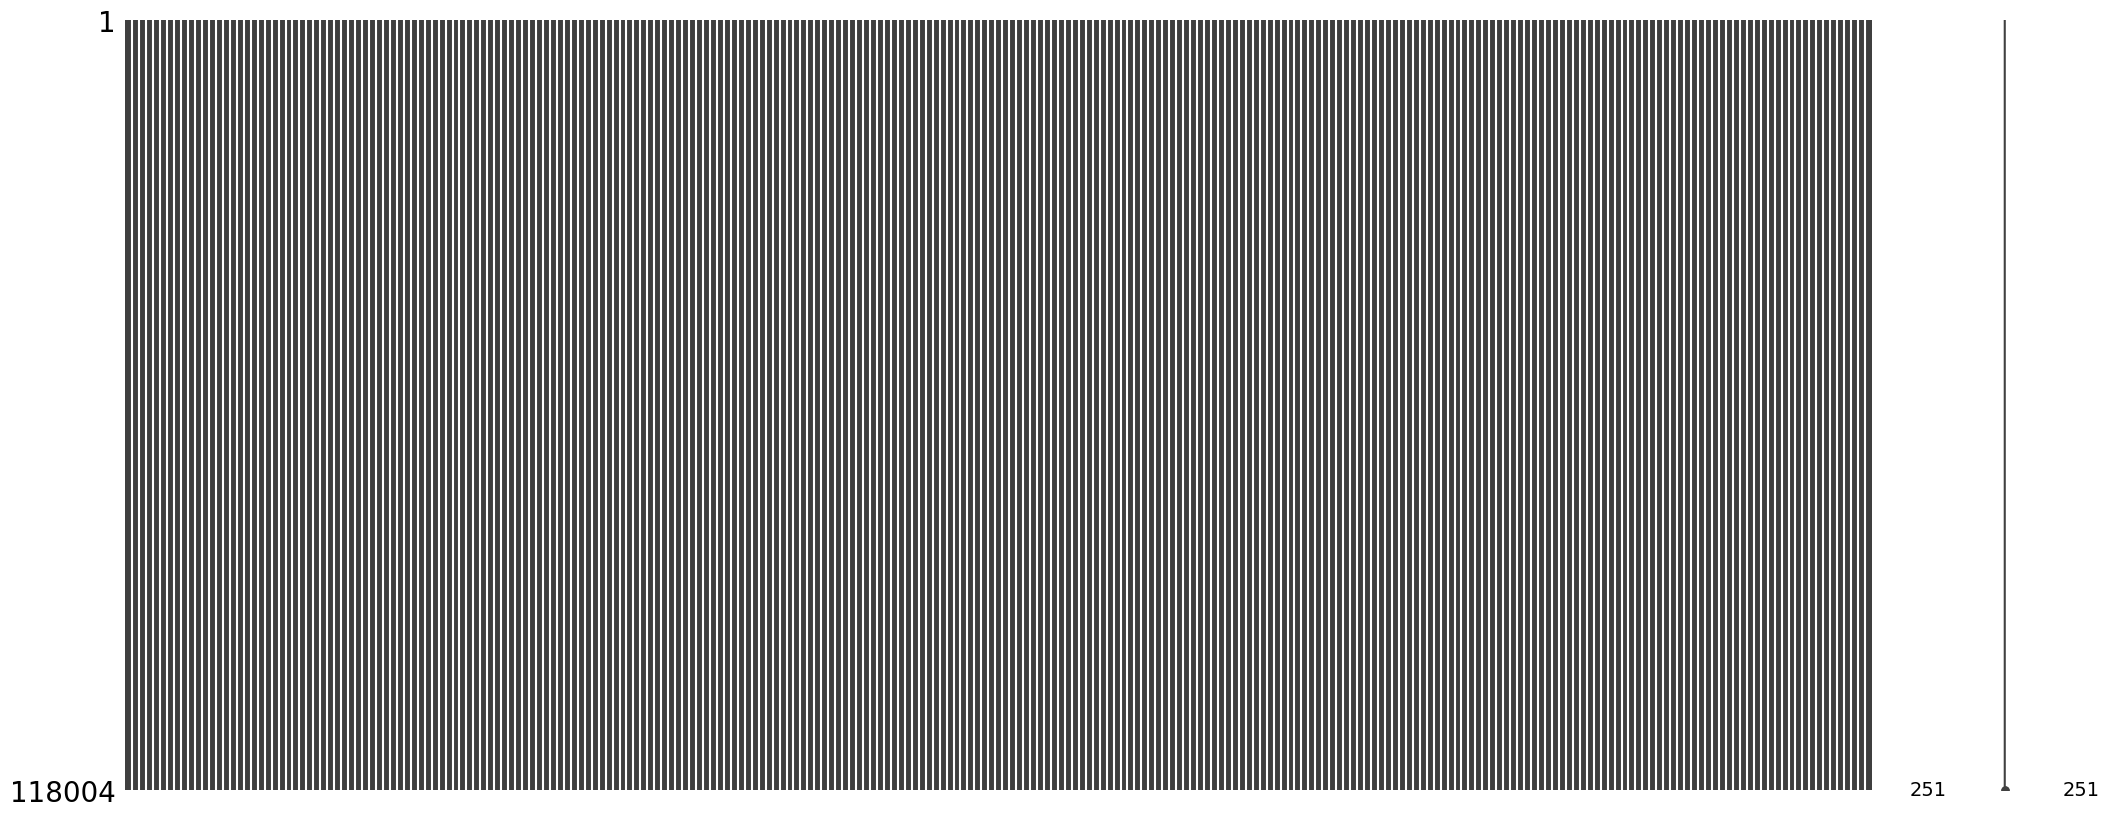

In [35]:
# Perform KNN imputation
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
    
imputed = imputer.fit_transform(to_be_imputed)
imputed = pd.DataFrame(imputed, columns = to_be_imputed.columns) # Transform nd array into dataframe

# Visualizing missing values in the data (before imputation)
msno.matrix(imputed_covar_meta)

In [ ]:
# Impute data using Random Forest (BEWARE: this takes forever to run!! Even after reducing n_estimator to 10)

#from sklearn.preprocessing import LabelEncoder
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#categorical = ['sex', 'inc', 'smo', 'alc', 'med_chol', 'eth', 'edu', 'pso']

#numerical_base = ['fas_t', 'bmi', 'age']
#numerical_meta = list(combined_nonull_meta_thresh.loc[:,'f.23400.0.0':'f.23648.0.0'])
#numerical = numerical_base + numerical_meta
    
#df[categorical] = df[categorical].apply(lambda series: pd.Series(
#    LabelEncoder().fit_transform(series[series.notnull()]),
#    index=series[series.notnull()].index
#))
        
#imp_num = IterativeImputer(estimator=RandomForestRegressor(n_estimators = 10),
#                           initial_strategy='mean',
#                           max_iter=5, random_state=0)
#imp_cat = IterativeImputer(estimator=RandomForestClassifier(n_estimators = 10), 
#                           initial_strategy='most_frequent',
#                           max_iter=5, random_state=0)
    
#df[numerical] = imp_num.fit_transform(df[numerical])
#df[categorical] = imp_cat.fit_transform(df[categorical])

## Handling outliers

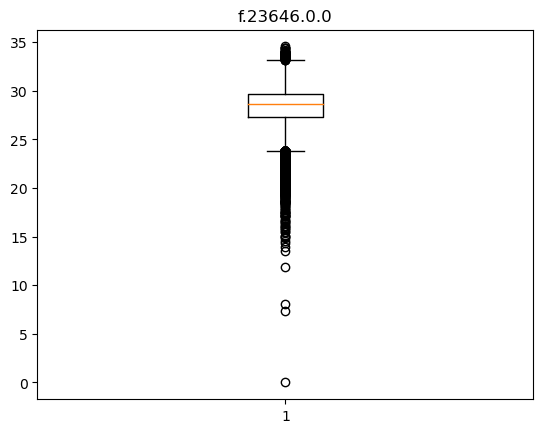

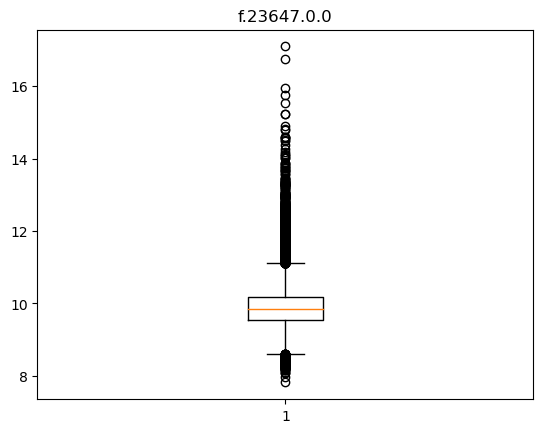

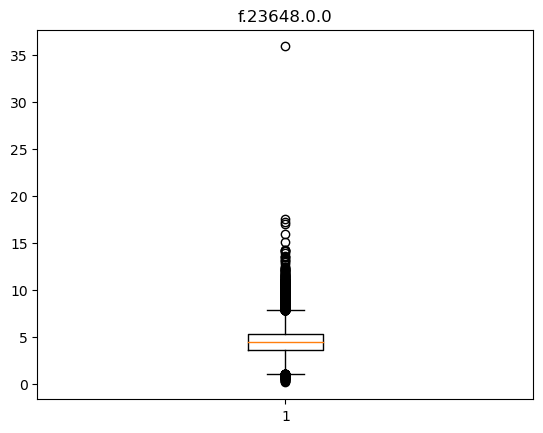

In [52]:
# Visualize data distribution before outliers removal 
meta_cols = list(imputed.iloc[:,-3:].columns)

for i in range(len(meta_cols)):
    plt.figure()
    plt.title(meta_cols[i])
    plt.boxplot(imputed[meta_cols[i]])

In [53]:
# Perform winsorization
meta_cols = list(imputed.iloc[:,2:].columns)
winsorized_meta = imputed.loc[:,'f.eid':'pso']

for i in range(len(meta_cols)):
    array = imputed[meta_cols[i]]
    winsorized_data = pd.Series(winsorize(array,(0.05,0.05)))
    winsorized_meta = pd.concat([winsorized_meta, winsorized_data.rename(meta_cols[i])], axis=1) 

winsorized_meta.shape

(118004, 251)

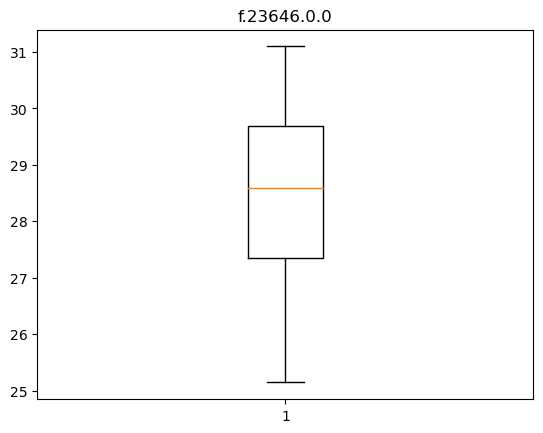

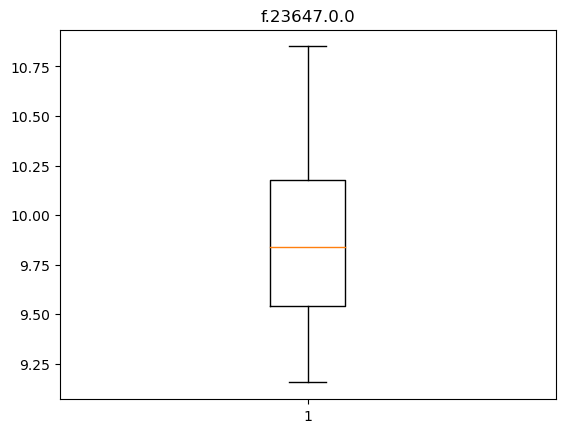

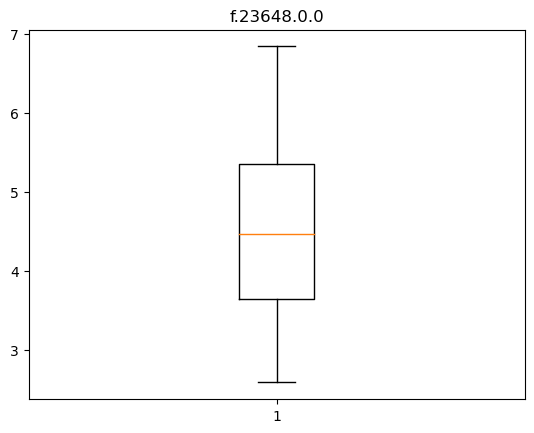

In [54]:
# Visualize data distribution after outliers removal
meta_cols = list(imputed.iloc[:,-3:].columns)

for i in range(len(meta_cols)):
    plt.figure()
    plt.title(meta_cols[i])
    plt.boxplot(winsorized_meta[meta_cols[i]])

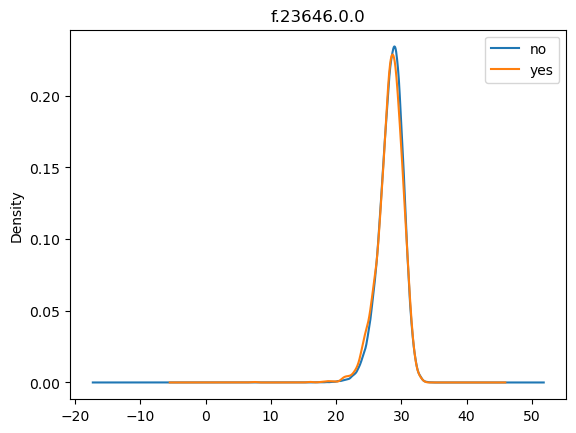

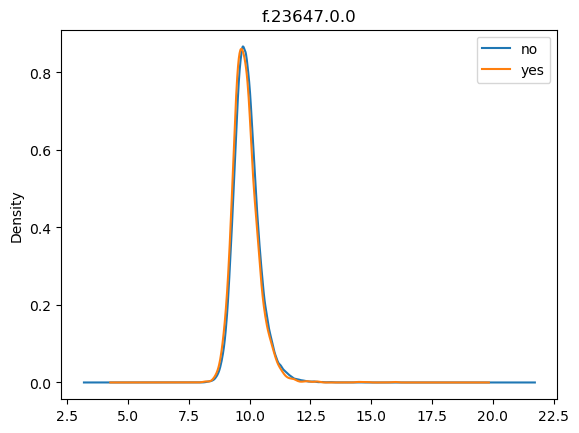

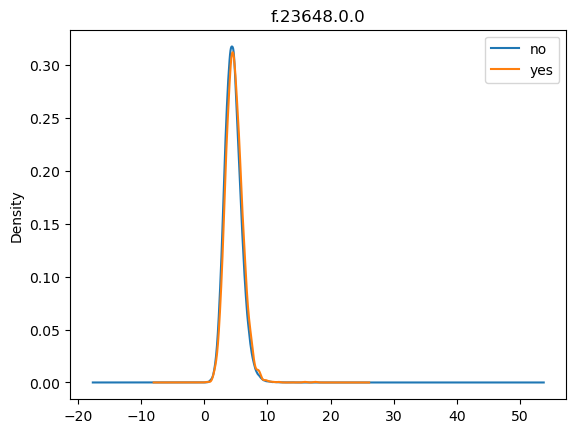

In [55]:
# Visualize data distribution after outliers removal
cols = imputed.iloc[:,-3:].columns

for i in range(len(cols)):
    plt.figure()
    plt.title(cols[i])
    winsorized_meta.groupby(['pso'])[cols[i]].plot(kind='kde', legend=True)

## Handling zero values

In [ ]:
# Winsorization also remove zero values, this section is used if winsorization is not performed
# Check how many 0 values 
#winsorized_meta['zero'] = np.sum(winsorized_meta == 0, axis=1)
#winsorized_meta['zero'].value_counts()

In [ ]:
# Replace 0 values with minimum value in each column
#meta_cols = list(imputed.columns[2:-1])
#minvalues = list(imputed.iloc[:, 2:-1].min())

#for i in range(len(meta_cols)):
#    col = imputed[meta_cols[i]]
#    col.replace(to_replace = 0, value = minvalues[i], inplace=True)